In [1]:
!pip install bert-for-tf2
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 862.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30509 sha256=d5c83e6482973427f535a863dc7b65f6068d06a63f733abca33540677965d0e0
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19454 sha256=fea092b492d432ad0dc7a15d22f6e52df9e25fc5e2148aa88e8ba22d00dc8eaf
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7891 sha256=8246229cc464bdb4dc699602d66fc163b8ca0075b326602b1159f9fe1a60b7d0
  Stored in directory: /root/.cache/pip/wheels/69/c8/b3/92666cff9fb312bc3473eaa6b396695b89a7b3e31e9087

In [2]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
#import tensorflow.contrib.keras as keras
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [5]:
cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [6]:
# Importing dataset
reviews_df = pd.read_csv('Hotel_Review.csv')
print(reviews_df.dtypes)
print(reviews_df.shape)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object
(515738, 17)


In [7]:
print(reviews_df.columns.values)

['Hotel_Address' 'Additional_Number_of_Scoring' 'Review_Date'
 'Average_Score' 'Hotel_Name' 'Reviewer_Nationality' 'Negative_Review'
 'Review_Total_Negative_Word_Counts' 'Total_Number_of_Reviews'
 'Positive_Review' 'Review_Total_Positive_Word_Counts'
 'Total_Number_of_Reviews_Reviewer_Has_Given' 'Reviewer_Score' 'Tags'
 'days_since_review' 'lat' 'lng']


In [8]:
df=reviews_df.drop(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
  'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
 'days_since_review', 'lat', 'lng'], axis=1)

In [9]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

cleaned_positive_reviews = [clean(r) for r in positive_reviews]
cleaned_negative_reviews = [clean(r) for r in negative_reviews]

reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [10]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(p)
    else :
        reviews_text.append(n)
        reviews_text.append(p)

In [11]:
print(reviews_text[:10])

[' cooked breakfast was only ok the sausages were overcooked and dry ', ' very quiet kitchenette is well equipped good bathroom friendly staff it is very convenient for the olympic park if not for the major tourist attractions of central london ', ' everything was great ', ' the decor and style is amazing the bar and restaurant is bustling in the evening the hotel is amazing ', ' the staff food and cleanliness in general was excellent ', ' bath and not walk in shower', ' location was good and good customer service ', ' only that the pillows were lumpy', ' glass of prossecco on arrival complimentary fruit water elemis toiletries nepresso coffee machine staff very friendly quiet room requested and got bang in the middle of the west end ', ' nothing ']


In [12]:
# Preprocessing training data
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

# Creating datasets
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)


dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [13]:
print(sentiment_df[:10])
print(reviews_text_df[:10])

                                             reviews  labels
0   cooked breakfast was only ok the sausages wer...       0
1   very quiet kitchenette is well equipped good ...       1
2                              everything was great        0
3   the decor and style is amazing the bar and re...       1
4   the staff food and cleanliness in general was...       1
5                        bath and not walk in shower       0
6       location was good and good customer service        1
7                   only that the pillows were lumpy       0
8   glass of prossecco on arrival complimentary f...       1
9                                           nothing        0
                                        reviews_text
0   cooked breakfast was only ok the sausages wer...
1   very quiet kitchenette is well equipped good ...
2                              everything was great 
3   the decor and style is amazing the bar and re...
4   the staff food and cleanliness in general was...
5          

In [14]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [15]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [16]:
reviews = []
sentences = list(sentiment_df['reviews'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

In [17]:
print(sentiment_df[:10])
print(reviews_text_df[:10])

                                             reviews  labels
0   cooked breakfast was only ok the sausages wer...       0
1   very quiet kitchenette is well equipped good ...       1
2                              everything was great        0
3   the decor and style is amazing the bar and re...       1
4   the staff food and cleanliness in general was...       1
5                        bath and not walk in shower       0
6       location was good and good customer service        1
7                   only that the pillows were lumpy       0
8   glass of prossecco on arrival complimentary f...       1
9                                           nothing        0
                                        reviews_text
0   cooked breakfast was only ok the sausages wer...
1   very quiet kitchenette is well equipped good ...
2                              everything was great 
3   the decor and style is amazing the bar and re...
4   the staff food and cleanliness in general was...
5          

In [18]:
print(sentiment_df.columns.values)

['reviews' 'labels']


In [19]:
reviews = []
sentences = list(sentiment_df['reviews'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

In [20]:
sentiment_df.labels.unique()

array([0, 1])

In [21]:
print(reviews[20])

 nothing 


In [22]:
y = sentiment_df['labels']

In [23]:
print(y[3])

1


In [24]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [25]:
tokenizer.tokenize("don't be so judgmental")

['don', "'", 't', 'be', 'so', 'judgment', '##al']

In [26]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("dont be so judgmental"))

[2123, 2102, 2022, 2061, 8689, 2389]

In [27]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize(reviews[10]))

[1996,
 3095,
 2001,
 6429,
 2092,
 4738,
 5379,
 5621,
 2228,
 2009,
 2190,
 2732,
 1999,
 2414,
 2023,
 2097,
 2272,
 2153]

In [28]:
def tokenize_reviews(reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(reviews))

In [29]:
tokenized_reviews = [tokenize_reviews(review) for review in reviews]

In [30]:
print(tokenized_reviews[11])

[2045, 2001, 2070, 2566, 3695, 16975, 5005, 2006, 1996, 5894, 2076, 7090, 1998, 2057, 11703, 28173, 2098, 2000, 2689, 1996, 2282, 2057, 2439, 2070, 7141, 12322, 5620, 2076, 1996, 2282, 2689, 1998, 2071, 2025, 2424, 2068, 2057, 2170, 2069, 2005, 2781, 1998, 2027, 5338, 2149, 2005, 9944, 2045, 2001, 2053, 2173, 1999, 1996, 7198, 2000, 2404, 11350, 2030, 25850, 24667]


In [31]:
reviews_with_len = [[review, y[i], len(labels)]
                 for i, review in enumerate(tokenized_reviews)]

In [32]:
import random
random.shuffle(reviews_with_len)

In [33]:
print(reviews_with_len[:10])

[[[3835, 4550, 1998, 2715, 4734, 6350, 4840, 1998, 7564, 1997, 3601], 1, 16822], [[2001, 5338, 2103, 4171, 3807, 2320, 2043, 7909, 2001, 2579, 1998, 2117, 2051, 2043, 2057, 2187, 1996, 3309], 0, 16822], [[14057, 2000, 1996, 3345, 2276, 6005, 19216, 1998, 7793], 1, 16822], [[2485, 2000, 7270, 2276], 1, 16822], [[5632, 2673], 0, 16822], [[2793, 2282, 2200, 3835, 2204, 2946, 1998, 2092, 4201, 2041, 3095, 5379], 1, 16822], [[2057, 2020, 9725, 2000, 3469, 2282, 2025, 2469, 2339, 2009, 2001, 2200, 22445, 5186, 4550, 1998, 1996, 5723, 2001, 2307, 2004, 2092, 2295, 2009, 2025, 1999, 1996, 2103, 2415, 2045, 2024, 7167, 1997, 7884, 1998, 6963, 2105, 2045, 2001, 17006, 1998, 6670, 2306, 8117, 3788, 3292, 2004, 2092, 1996, 7541, 12517, 2644, 2001, 2625, 2084, 20595, 2185], 1, 16822], [[2793, 2001, 2061, 6625, 2348, 4851, 2005, 2309, 9705, 1998, 2108, 2445, 3313, 2001, 4487, 11488, 8400, 2075, 1996, 7597, 2012, 1996, 3347, 2024, 2061, 6450, 2036, 2069, 2060, 2518, 2001, 1996, 3295, 2001, 1999, 3243

In [34]:
reviews_with_len.sort(key=lambda x: x[2])

In [35]:
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]

In [36]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))

In [37]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [38]:
next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 69), dtype=int32, numpy=
 array([[ 3835,  4550,  1998, ...,     0,     0,     0],
        [ 2001,  5338,  2103, ...,     0,     0,     0],
        [14057,  2000,  1996, ...,     0,     0,     0],
        ...,
        [ 5379,  1998,  2200, ...,     0,     0,     0],
        [ 6457,  6644,  3714, ...,     0,     0,     0],
        [ 2045,  2003,  2053, ...,     0,     0,     0]], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int32)>)

In [39]:
import math
TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

In [40]:
class TEXT_MODEL(tf.keras.Model):

    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=True,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)

        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()

        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")

    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l)
        l_1 = self.pool(l_1)
        l_2 = self.cnn_layer2(l)
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3)

        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)

        return model_output

In [41]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2

DROPOUT_RATE = 0.2

NB_EPOCHS = 5

In [42]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [43]:
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [44]:
text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5
474/474 [==============================] - 96s 196ms/step - loss: 0.2350 - accuracy: 0.9049
Epoch 2/5
474/474 [==============================] - 93s 197ms/step - loss: 0.1136 - accuracy: 0.9611
Epoch 3/5
474/474 [==============================] - 90s 190ms/step - loss: 0.0662 - accuracy: 0.9782
Epoch 4/5
474/474 [==============================] - 85s 179ms/step - loss: 0.0495 - accuracy: 0.9831
Epoch 5/5
474/474 [==============================] - 97s 203ms/step - loss: 0.0468 - accuracy: 0.9838


In [48]:
loss, accuracy = text_model.evaluate(test_data)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

52/52 [==============================] - 3s 44ms/step - loss: 0.3313 - accuracy: 0.9225
Test Loss: 0.3313220739364624
Test Accuracy: 0.9224759340286255


In [49]:
y_pred = tf.nn.softmax(text_model.predict(test_data))

52/52 [==============================] - 2s 38ms/step


In [50]:
y_pred_argmax = tf.math.argmax(y_pred, axis=1)

In [51]:
y_true = tf.Variable([], dtype=tf.int32)

for labels, labels in test_data.take(-1):
    y_true = tf.concat([y_true, labels], 0)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.47      0.63      1664
           1       0.00      0.00      0.00         0

    accuracy                           0.47      1664
   macro avg       0.50      0.23      0.32      1664
weighted avg       1.00      0.47      0.63      1664



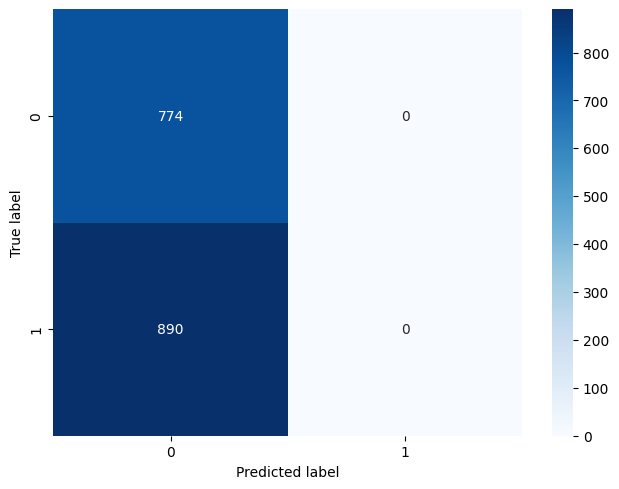

In [52]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

def visualize_confusion_matrix(y_pred_argmax, y_true):
    """

    :param y_pred_arg: This is an array with values that are 0 or 1
    :param y_true: This is an array with values that are 0 or 1
    :return:
    """

    cm = tf.math.confusion_matrix(y_true, y_pred_argmax).numpy()
    con_mat_df = pd.DataFrame(cm)

    print(classification_report(y_pred_argmax, y_true))

    sns.heatmap(con_mat_df, annot=True, fmt='g', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#print(classification_report(test_labels, baseline_predicted))
visualize_confusion_matrix(y_pred_argmax, y_true)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.47      0.63      1664
           1       0.00      0.00      0.00         0

    accuracy                           0.47      1664
   macro avg       0.50      0.23      0.32      1664
weighted avg       1.00      0.47      0.63      1664



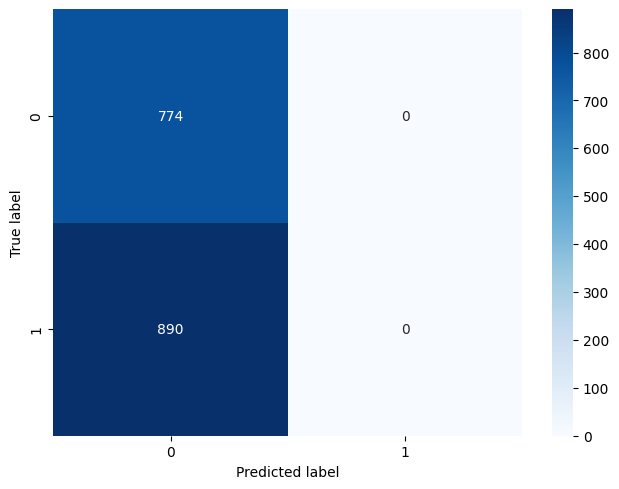

Matthews Correlation Coefficient: 0.0


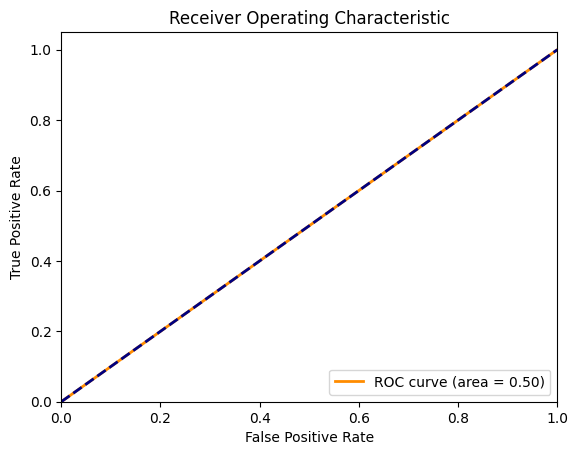

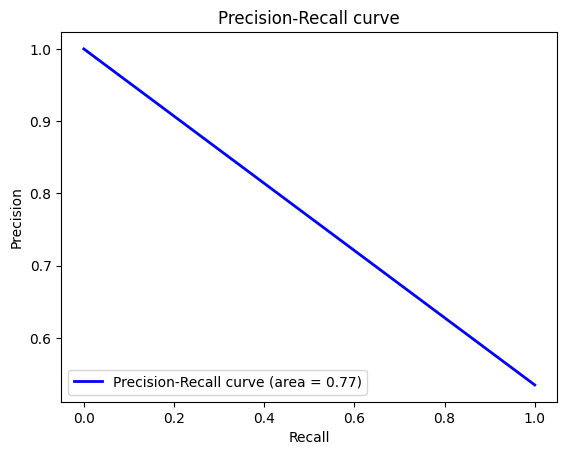

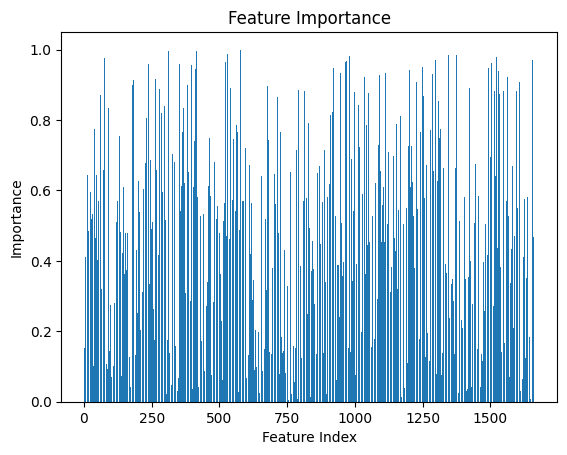

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, matthews_corrcoef, roc_curve, precision_recall_curve, auc
import numpy as np

def visualize_confusion_matrix(y_pred_argmax, y_true):
    cm = tf.math.confusion_matrix(y_true, y_pred_argmax).numpy()
    con_mat_df = pd.DataFrame(cm)

    print(classification_report(y_pred_argmax, y_true))

    sns.heatmap(con_mat_df, annot=True, fmt='g', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Matthews correlation coefficient
    mcc = matthews_corrcoef(y_true, y_pred_argmax)
    print("Matthews Correlation Coefficient:", mcc)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_argmax)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_argmax)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower left")
    plt.show()

    # Feature importance graph (if applicable)
    # Replace feature_importance_values with your actual feature importance values
    feature_importance_values = np.random.rand(len(y_true))
    plt.figure()
    plt.bar(range(len(feature_importance_values)), feature_importance_values)
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.show()

# Assuming y_pred_argmax and y_true are defined elsewhere
visualize_confusion_matrix(y_pred_argmax, y_true)


In [54]:
loss, accuracy = text_model.evaluate(test_data)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

52/52 [==============================] - 2s 34ms/step - loss: 0.3313 - accuracy: 0.9225
Test Loss: 0.3313220739364624
Test Accuracy: 0.9224759340286255


Epoch 1/5
474/474 [==============================] - 104s 211ms/step - loss: 0.0416 - accuracy: 0.9866
Epoch 2/5
474/474 [==============================] - 103s 216ms/step - loss: 0.0373 - accuracy: 0.9871
Epoch 3/5
474/474 [==============================] - 104s 218ms/step - loss: 0.0332 - accuracy: 0.9882
Epoch 4/5
474/474 [==============================] - 90s 189ms/step - loss: 0.0300 - accuracy: 0.9887
Epoch 5/5
52/52 [==============================] - 3s 58ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.47      0.63      1664
           1       0.00      0.00      0.00         0

    accuracy                           0.47      1664
   macro avg       0.50      0.23      0.32      1664
weighted avg       1.00      0.47      0.63      1664



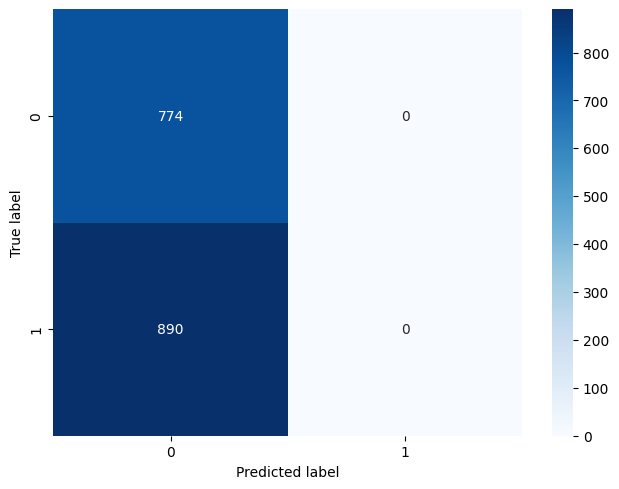

Matthews Correlation Coefficient: 0.0


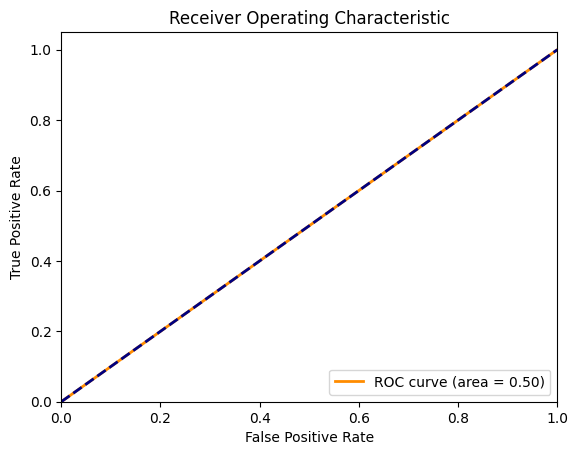

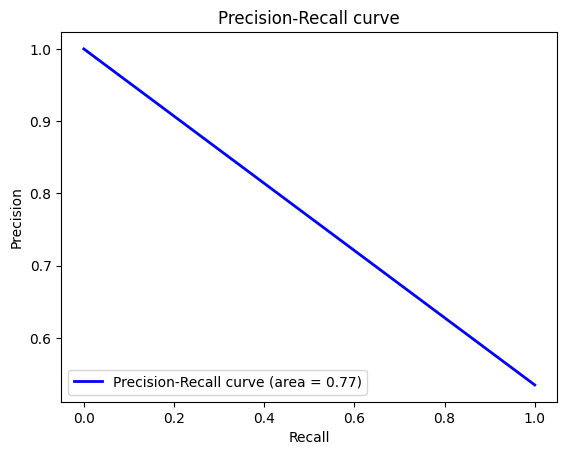

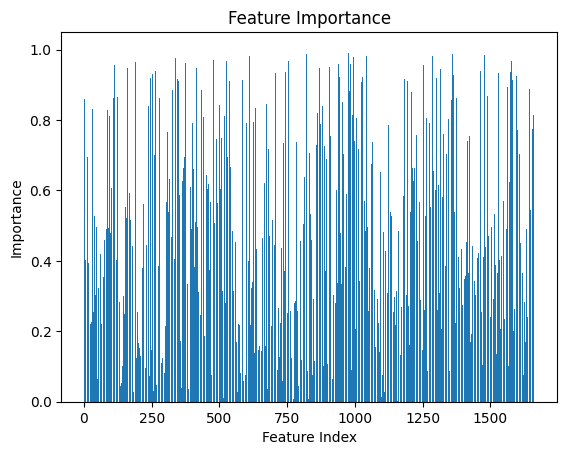

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, matthews_corrcoef, roc_curve, precision_recall_curve, auc
import numpy as np

def visualize_confusion_matrix(y_pred_argmax, y_true):
    cm = tf.math.confusion_matrix(y_true, y_pred_argmax).numpy()
    con_mat_df = pd.DataFrame(cm)

    print(classification_report(y_pred_argmax, y_true))

    sns.heatmap(con_mat_df, annot=True, fmt='g', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Matthews correlation coefficient
    mcc = matthews_corrcoef(y_true, y_pred_argmax)
    print("Matthews Correlation Coefficient:", mcc)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_argmax)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_argmax)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower left")
    plt.show()

    # Feature importance graph (if applicable)
    # Replace feature_importance_values with your actual feature importance values
    feature_importance_values = np.random.rand(len(y_true))
    plt.figure()
    plt.bar(range(len(feature_importance_values)), feature_importance_values)
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.show()

# Assuming y_pred_argmax and y_true are defined elsewhere
text_model.fit(train_data, epochs=NB_EPOCHS)
y_pred = text_model.predict(test_data)  # Assuming you have test data
y_pred_argmax = np.argmax(y_pred, axis=1)  # Convert probabilities to classes
visualize_confusion_matrix(y_pred_argmax, y_true)
